In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import pandas
import pixiedust

Pixiedust database opened successfully


Unable to check latest version <urlopen error [Errno 8] nodename nor servname provided, or not known>


In [3]:
def readOnsetCSV(audiofilename,csvfilename):

    sig , sr = librosa.load(audiofilename,mono=True,sr=None)

    df = pandas.read_csv(csvfilename,header=None)
    times = df.loc[:,0]

    D = np.abs(librosa.stft(sig,n_fft=4096))
    plt.figure()
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
    plt.title('Estimated from Sonic Visualiser')
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.vlines(times, 0, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.axis('tight')
    plt.legend(frameon=True, framealpha=0.75)
    
    return sig, sr, times

In [ ]:
%%pixie_debugger
y, sr = librosa.load('kingsLoop.wav')
samp = np.zeros(len(y))
sampLoc=librosa.time_to_samples(times.values, sr=sr)
samp[sampLoc]=1
IPython.display.Audio(data=samp, rate=sr)

In [7]:
IPython.display.Audio(data=y, rate=sr)

In [8]:
newSig=np.zeros((len(y),2))
newSig[:,0]=samp
newSig[:,1]=y
meanNewSig=np.mean(newSig,1)


#newSig=np.vstack((samp,y))
IPython.display.Audio(data=meanNewSig, rate=sr)

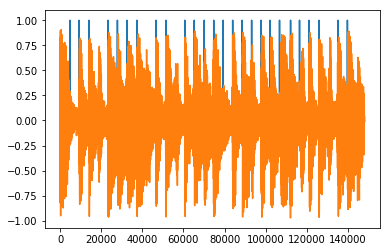

In [9]:
plt.figure()
plt.plot(newSig)

In [10]:
sig2 , sr2 = librosa.load("avm.wav",mono=True,sr=None)

In [11]:
intensitydf = pandas.read_csv("avmIntensity.csv",header=None)
intensityVals = intensitydf.values

rmsdf = pandas.read_csv("avmrms.csv",header=None) 
rmsVals = rmsdf.values

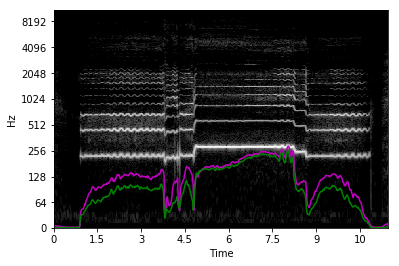

In [12]:
D = np.abs(librosa.stft(sig2,n_fft=4096))
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log',cmap='gray')
plt.hold
plt.plot(intensityVals[:,0],intensityVals[:,1],color = 'm')
plt.plot(rmsVals[:,0],rmsVals[:,1]*1000,color = 'g')

In [13]:
IPython.display.Audio(data=sig2, rate=sr2)